In [25]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.5.2


In [36]:
# 4a - Loading the Iris dataset
# The Iris dataset contains information about 150 iris flowers, categorized into three species.
# Each flower is described by four features: Sepal Length, Sepal Width, Petal Length, and Petal Width.

from sklearn.datasets import load_iris

# Loading the dataset
iris = load_iris()

# Extracting features (X) and labels (y)
X = iris.data  # 150 samples × 4 features
y = iris.target  # 150 labels (flower species: 0, 1, or 2)

# Displaying the basic dataset information
print("\nIris dataset loaded successfully!")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Class labels: {list(iris.target_names)}")  # ['setosa', 'versicolor', 'virginica']

# This is going to show the first rows 
print("\nFirst 5 samples (feature values and labels):")
for i in range(5):
    print(f"Sample {i+1}: Features: {X[i]} --> Label: {y[i]} ({iris.target_names[y[i]]})")



Iris dataset loaded successfully!
Number of samples: 150
Number of features: 4
Class labels: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 samples (feature values and labels):
Sample 1: Features: [5.1 3.5 1.4 0.2] --> Label: 0 (setosa)
Sample 2: Features: [4.9 3.  1.4 0.2] --> Label: 0 (setosa)
Sample 3: Features: [4.7 3.2 1.3 0.2] --> Label: 0 (setosa)
Sample 4: Features: [4.6 3.1 1.5 0.2] --> Label: 0 (setosa)
Sample 5: Features: [5.  3.6 1.4 0.2] --> Label: 0 (setosa)


In [37]:
#4b - Splitting the dataset into training (60%) and test (40%) sets

def custom_shuffle(indices):
    """Shuffle a list of indices manually."""
    for i in range(len(indices) - 1, 0, -1):
        j = int(i * (i + 1) / 2) % (i + 1)  # Simple deterministic shuffle
        indices[i], indices[j] = indices[j], indices[i]
    return indices
# This manually shuffles indices using a custom shuffle function

indices = list(range(len(X)))
# Creating a list of indices [0, 1, 2, ..., 149]


indices = custom_shuffle(indices)
# Shuffling the indices manually

split_point = int(0.6 * len(X))
# Calculating the split point (60% for training, 40% for testing)

# Split the data into training and test sets
X_train = [X[i] for i in indices[:split_point]]  # Training features
X_test = [X[i] for i in indices[split_point:]]   # Test features
y_train = [y[i] for i in indices[:split_point]]  # Training labels
y_test = [y[i] for i in indices[split_point:]]   # Test labels

# Printing the shapes of the training and test sets
print("Training set size (X_train):", len(X_train))  
print("Test set size (X_test):", len(X_test))        

# Preprocessing the data in three ways :
# 1. Unprocessed (original data)
# 2. Normalized (scaled to [0, 1])
# 3. Standardized (mean = 0, standard deviation = 1)

# Unprocessed Data
print("\nUnprocessed data (first 5 samples of X_train):")
for sample in X_train[:5]:
    print([round(float(x), 3) for x in sample])  

# Normalized Data 
def normalize(X, X_train_min, X_train_max):
    """
    Normalize data: Scale features to [0, 1] using training min/max.
    """
    X_norm = []
    for sample in X:
        normalized_sample = [(x - min_val) / (max_val - min_val) for x, min_val, max_val in zip(sample, X_train_min, X_train_max)]
        X_norm.append([round(float(x), 3) for x in normalized_sample]) 
    return X_norm

# Computing min/max from training data
X_train_min = [min(col) for col in zip(*X_train)]  
X_train_max = [max(col) for col in zip(*X_train)] 

# Normalizing training and test data using training min/max
X_train_norm = normalize(X_train, X_train_min, X_train_max)
X_test_norm = normalize(X_test, X_train_min, X_train_max)

print("\nNormalized data (first 5 samples of X_train_norm):")
for sample in X_train_norm[:5]:
    print(sample)

# Standardized Data
def standardize(X, X_mean, X_std):
    """
    Standardize data: Transform features to have mean = 0 and std = 1.
    """
    X_std_transformed = []
    for sample in X:
        standardized_sample = [(x - mean_val) / (std_val if std_val != 0 else 1) for x, mean_val, std_val in zip(sample, X_mean, X_std)]
        X_std_transformed.append([round(float(x), 3) for x in standardized_sample])  
    return X_std_transformed

# Computing mean from training data
X_train_mean = [sum(col) / len(col) for col in zip(*X_train)]  

# Computing standard deviation from training data
X_train_std = []
for col, mean_val in zip(zip(*X_train), X_train_mean):
    variance = sum((x - mean_val) ** 2 for x in col) / (len(col) - 1)  
    std_dev = variance ** 0.5  
    X_train_std.append(std_dev)

# To avoid division by zero by replacing zero std values with 1
X_train_std_fixed = [std_val if std_val != 0 else 1 for std_val in X_train_std]

# To standardize training and test data using training mean/std
X_train_std = standardize(X_train, X_train_mean, X_train_std_fixed)
X_test_std = standardize(X_test, X_train_mean, X_train_std_fixed)

print("\nStandardized data (first 5 samples of X_train_std):")
for sample in X_train_std[:5]:
    print(sample)

print("\nPreprocessing summary:")
print("1. Unprocessed data: Original feature values.")
print("2. Normalized data: Features scaled to [0, 1] using training min/max.")
print("3. Standardized data: Features with mean = 0 and standard deviation = 1 using training mean/std.")

Training set size (X_train): 90
Test set size (X_test): 60

Unprocessed data (first 5 samples of X_train):
[7.2, 3.0, 5.8, 1.6]
[4.9, 3.0, 1.4, 0.2]
[6.2, 2.9, 4.3, 1.3]
[4.7, 3.2, 1.3, 0.2]
[5.5, 2.4, 3.7, 1.0]

Normalized data (first 5 samples of X_train_norm):
[0.806, 0.364, 0.842, 0.625]
[0.167, 0.364, 0.07, 0.042]
[0.528, 0.318, 0.579, 0.5]
[0.111, 0.455, 0.053, 0.042]
[0.333, 0.091, 0.474, 0.375]

Standardized data (first 5 samples of X_train_std):
[1.773, -0.36, 1.385, 0.811]
[-0.881, -0.36, -0.976, -0.985]
[0.619, -0.582, 0.58, 0.426]
[-1.112, 0.084, -1.029, -0.985]
[-0.188, -1.691, 0.258, 0.041]

Preprocessing summary:
1. Unprocessed data: Original feature values.
2. Normalized data: Features scaled to [0, 1] using training min/max.
3. Standardized data: Features with mean = 0 and standard deviation = 1 using training mean/std.


In [45]:
#4c - Softmax function

import math 

# Defining the Softmax function
def softmax(logits):
    """
    Applies the Softmax function to a set of logits.

    Parameters:
    logits (list or list of lists): A 1D or 2D list of raw scores (logits).

    Returns:
    list or list of lists: Probabilities after applying Softmax.
    """
    # To check if the input is a 1D list (single sample) or 2D list (multiple samples)
    if isinstance(logits[0], list):  # 2D case
        probabilities = []
        for sample in logits:
            # Subtracting the maximum logit for numerical stability
            max_logit = max(sample)
            exp_logits = [math.exp(x - max_logit) for x in sample]
            
            # Computing the sum of exponentials
            sum_exp_logits = sum(exp_logits)
            
            # Computing the Softmax probabilities
            softmax_probs = [x / sum_exp_logits for x in exp_logits]
            probabilities.append([round(p, 3) for p in softmax_probs])  
        return probabilities
    else:  # 1D case
        # Subtracting the maximum logit for numerical stability
        max_logit = max(logits)
        exp_logits = [math.exp(x - max_logit) for x in logits]
        
        # To compute the sum of exponentials
        sum_exp_logits = sum(exp_logits)
        
        # Computing Softmax probabilities
        probabilities = [round(x / sum_exp_logits, 3) for x in exp_logits]  
        return probabilities

# Testing the Softmax function
# Example 1: Single sample (1D list)
logits_1d = [2.0, 1.0, 0.1]  
probabilities_1d = softmax(logits_1d)
print("Softmax output for 1D logits:", probabilities_1d)

# Example 2: Multiple samples (2D list)
logits_2d = [[2.0, 1.0, 0.1],  
             [1.0, 2.0, 0.1], 
             [0.1, 1.0, 2.0]]  
probabilities_2d = softmax(logits_2d)
print("\nSoftmax output for 2D logits:")
for probs in probabilities_2d:
    print(probs)

Softmax output for 1D logits: [0.659, 0.242, 0.099]

Softmax output for 2D logits:
[0.659, 0.242, 0.099]
[0.242, 0.659, 0.099]
[0.099, 0.242, 0.659]


Epoch 100, Loss: 0.6019
Epoch 200, Loss: 0.4795
Epoch 300, Loss: 0.4249
Epoch 400, Loss: 0.3927
Epoch 500, Loss: 0.3705
Epoch 600, Loss: 0.3536
Epoch 700, Loss: 0.3400
Epoch 800, Loss: 0.3286
Epoch 900, Loss: 0.3187
Epoch 1000, Loss: 0.3100

 0.9ning Accuracy:
Test Accuracy: 0.783

Confusion Matrix:
[5, 0, 0]
[0, 17, 13]
[0, 0, 25]

Classification Report:
Precision: [1.0, 1.0, 0.658]
Recall: [1.0, 0.567, 1.0]
F1-Score: [1.0, 0.724, 0.794]


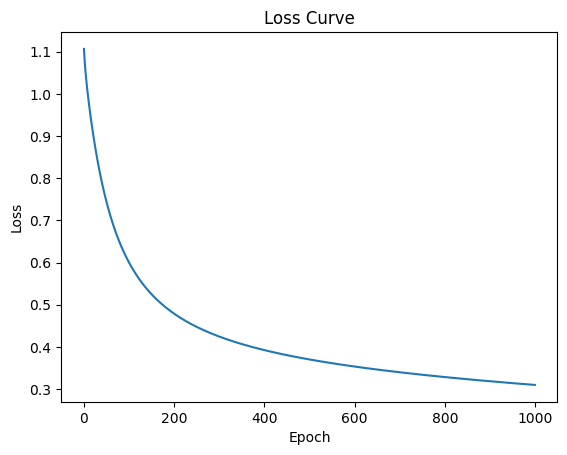

In [47]:
#4d - Implementing Multiclass Logistic Regression

import math  
import random  
import matplotlib.pyplot as plt  

# Softmax Calculations
def softmax(logits):
    """
    Applies the softmax function to a set of logits, ensuring numerical stability.
    """
    if isinstance(logits[0], list):  # 2D case
        probabilities = []
        for sample in logits:
            max_logit = max(sample)
            exp_logits = [math.exp(x - max_logit) for x in sample]
            sum_exp_logits = sum(exp_logits)
            probabilities.append([x / sum_exp_logits for x in exp_logits])
        return probabilities
    else:  # 1D case
        max_logit = max(logits)
        exp_logits = [math.exp(x - max_logit) for x in logits]
        sum_exp_logits = sum(exp_logits)
        return [x / sum_exp_logits for x in exp_logits]


# Categorical Cross-Entropy Loss
def categorical_cross_entropy(y_true, y_pred):
    """
    Computes the categorical cross-entropy loss with numerical stability.
    """
    epsilon = 1e-12  # Small constant to prevent log(0)
    m = len(y_true)
    loss = -sum(y_true[i][j] * math.log(y_pred[i][j] + epsilon) 
              for i in range(m) for j in range(len(y_true[i]))) / m
    return loss

# One-Hot Encoding
def one_hot_encode(labels, num_classes):
    """
    Converts class labels into one-hot encoded vectors.
    """
    return [[1 if j == label else 0 for j in range(num_classes)] for label in labels]

# Gradient Descent (Batch)
def gradient_descent(X, y_true, weights, learning_rate, epochs):
    """
    Trains the model using gradient descent (batch).
    """
    m, num_features = len(X), len(X[0])
    num_classes = len(y_true[0])
    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        logits = [[sum(X[i][k] * weights[j][k] for k in range(num_features)) 
                   for j in range(num_classes)] for i in range(m)]
        y_pred = softmax(logits)

        # Computing loss
        loss = categorical_cross_entropy(y_true, y_pred)
        loss_history.append(loss)

        # Backward pass (Compute gradients)
        gradients = [[0] * num_features for _ in range(num_classes)]
        for i in range(m):
            for j in range(num_classes):
                for k in range(num_features):
                    gradients[j][k] += (y_pred[i][j] - y_true[i][j]) * X[i][k]

        # Update weights
        for j in range(num_classes):
            for k in range(num_features):
                weights[j][k] -= (learning_rate / m) * gradients[j][k]

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return weights, loss_history

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y_true, weights, learning_rate, epochs):
    """
    Trains the model using stochastic gradient descent (SGD).
    """
    m, num_features = len(X), len(X[0])
    num_classes = len(y_true[0])
    loss_history = []

    for epoch in range(epochs):
        indices = list(range(m))
        random.shuffle(indices)

        for i in indices:
            # Forward pass
            logits = [sum(X[i][k] * weights[j][k] for k in range(num_features)) for j in range(num_classes)]
            y_pred = softmax(logits)

            # Backward pass (Compute gradients)
            for j in range(num_classes):
                for k in range(num_features):
                    weights[j][k] -= learning_rate * (y_pred[j] - y_true[i][j]) * X[i][k]

        # Computing loss after epoch
        logits = [[sum(X[i][k] * weights[j][k] for k in range(num_features)) 
                   for j in range(num_classes)] for i in range(m)]
        y_pred = softmax(logits)
        loss = categorical_cross_entropy(y_true, y_pred)
        loss_history.append(loss)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return weights, loss_history

# Model Evaluation
def predict(X, weights):
    """
    Predicts class labels for given input data.
    """
    num_classes, num_features = len(weights), len(X[0])
    logits = [[sum(X[i][k] * weights[j][k] for k in range(num_features)) 
               for j in range(num_classes)] for i in range(len(X))]
    y_pred = softmax(logits)
    return [max(range(len(probs)), key=lambda j: probs[j]) for probs in y_pred]

def accuracy(y_true, y_pred):
    """
    Computes classification accuracy.
    """
    return round(sum(1 for i in range(len(y_true)) if y_true[i] == y_pred[i]) / len(y_true), 3)

def confusion_matrix(y_true, y_pred, num_classes):
    """
    Computes the confusion matrix.
    """
    matrix = [[0] * num_classes for _ in range(num_classes)]
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix

def classification_report(y_true, y_pred, num_classes):
    """
    Computes precision, recall, and F1-score for each class.
    """
    matrix = confusion_matrix(y_true, y_pred, num_classes)
    precision = [round(matrix[i][i] / sum(matrix[j][i] for j in range(num_classes)), 3) for i in range(num_classes)]
    recall = [round(matrix[i][i] / sum(matrix[i][j] for j in range(num_classes)), 3) for i in range(num_classes)]
    f1_score = [round(2 * (p * r) / (p + r), 3) if (p + r) != 0 else 0 for p, r in zip(precision, recall)]
    return precision, recall, f1_score

# Loss Curve Visualization
def plot_loss_curve(loss_history):
    """
    Plots the loss curve over training epochs.
    """
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()


# Main Workflow
# Loading and preprocessing dataset (assuming X_train, X_test, y_train, y_test exist)
num_classes = 3
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

# Initializing weights
num_features = len(X_train[0])
weights = [[random.uniform(-0.01, 0.01) for _ in range(num_features)] for _ in range(num_classes)]

# Training model
learning_rate = 0.01
epochs = 1000
weights, loss_history = gradient_descent(X_train, y_train_one_hot, weights, learning_rate, epochs)

# Evaluating
y_pred_train = predict(X_train, weights)
y_pred_test = predict(X_test, weights)

train_acc = accuracy(y_train, y_pred_train)
test_acc = accuracy(y_test, y_pred_test)

print("\nTraining Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_test, num_classes)
precision, recall, f1_score = classification_report(y_test, y_pred_test, num_classes)

print("\nConfusion Matrix:")
for row in conf_matrix:
    print(row)

print("\nClassification Report:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

# Ploting the loss curve
plot_loss_curve(loss_history)